In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 6)

In [9]:
df.Species.unique ()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
data = df.drop (columns = ["Species", "Id"])

In [19]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Building K Means Algorithm

In [25]:
from sklearn.cluster import KMeans

In [29]:
k = 4
ka = KMeans(n_clusters = k)
ka.fit(data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [31]:
##with in cluster sum of square 
ka.inertia_

57.47327326549492

In [33]:
## cluster centroinds
ka.cluster_centers_

array([[6.29361702, 2.9       , 4.95106383, 1.72978723],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [5.58      , 2.63333333, 3.98666667, 1.23333333]])

In [37]:
predicted_clusters = ka.fit_predict(data)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
predicted_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2])

In [41]:
output = data
output ["cluster"] = predicted_clusters

In [44]:
output

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Elbow method

In [49]:
data = data.drop(columns = ["cluster"])

In [51]:
## Traning 10 models for 10 clusters
inertias = []
for i in range (1, 11):
    ka = KMeans(n_clusters = i)
    ka.fit(data)
    inertias.append(ka.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

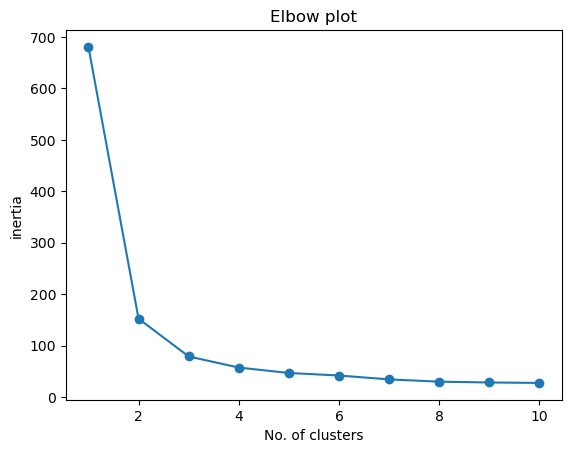

In [74]:
## Elbow plot
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertias, marker = 'o')
plt.title("Elbow plot")
plt.xlabel("No. of clusters")
plt.ylabel("inertia")
plt.show()

In [61]:
## Final cluster model with 3 clusters

In [67]:
km = KMeans(n_clusters = 3)
km.fit(data)
km.inertia_ 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


78.94506582597731

In [69]:
df ["clusters"] = km.predict(data)

In [71]:
df.to_csv("out.csv")